<a href="https://colab.research.google.com/github/sakib927/My-Data-Science/blob/main/Test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules

In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing Data

In [ ]:
colname = ('A','B')
data = pd.read_csv('/content/drive/MyDrive/data_2_var.csv',names = colname)

In [ ]:
#to check first 5 values
data.head(5)

,A,B
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [ ]:
#removing the duplicate values from the data set
data = data.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
#to check statistics of the data
data.describe()

,A,B
count,1090.000000,1090.000000
mean,8.116185,-27.383628
std,78.769201,68.371895
min,-134.962839,-132.422167
25%,-51.041357,-76.994298
50%,17.462087,-46.300938
75%,76.481078,5.113101
max,134.605775,134.425495


In [ ]:
#to check the null values in the data
data.isnull().sum()

A    0
B    0
dtype: int64

In [ ]:
#to check the shape of the data
data.shape

(1090, 2)

In [ ]:
#to check the size of the data
data.size

2180

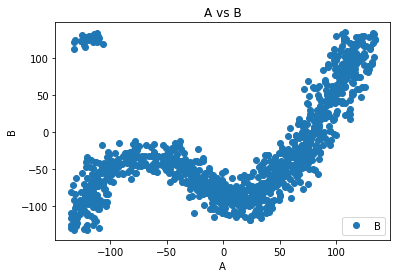

In [ ]:
# Plotting the distribution of A and B
data.plot(x='A', y='B', style='o')  
plt.title('A vs B')  
plt.xlabel('A')  
plt.ylabel('B')  
plt.show()

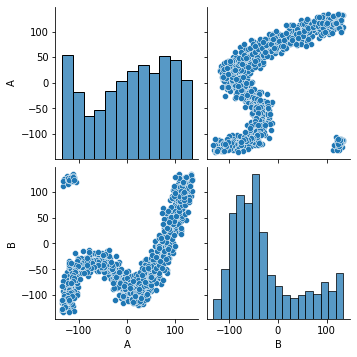

In [ ]:
sns.pairplot(data, vars = ['A', 'B']);

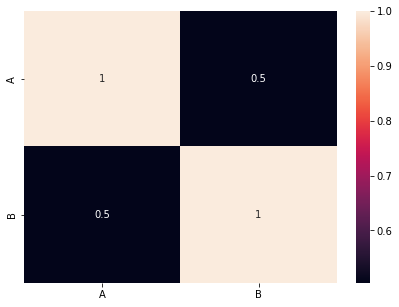

In [ ]:
#Drawing the heatmap of corelation
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

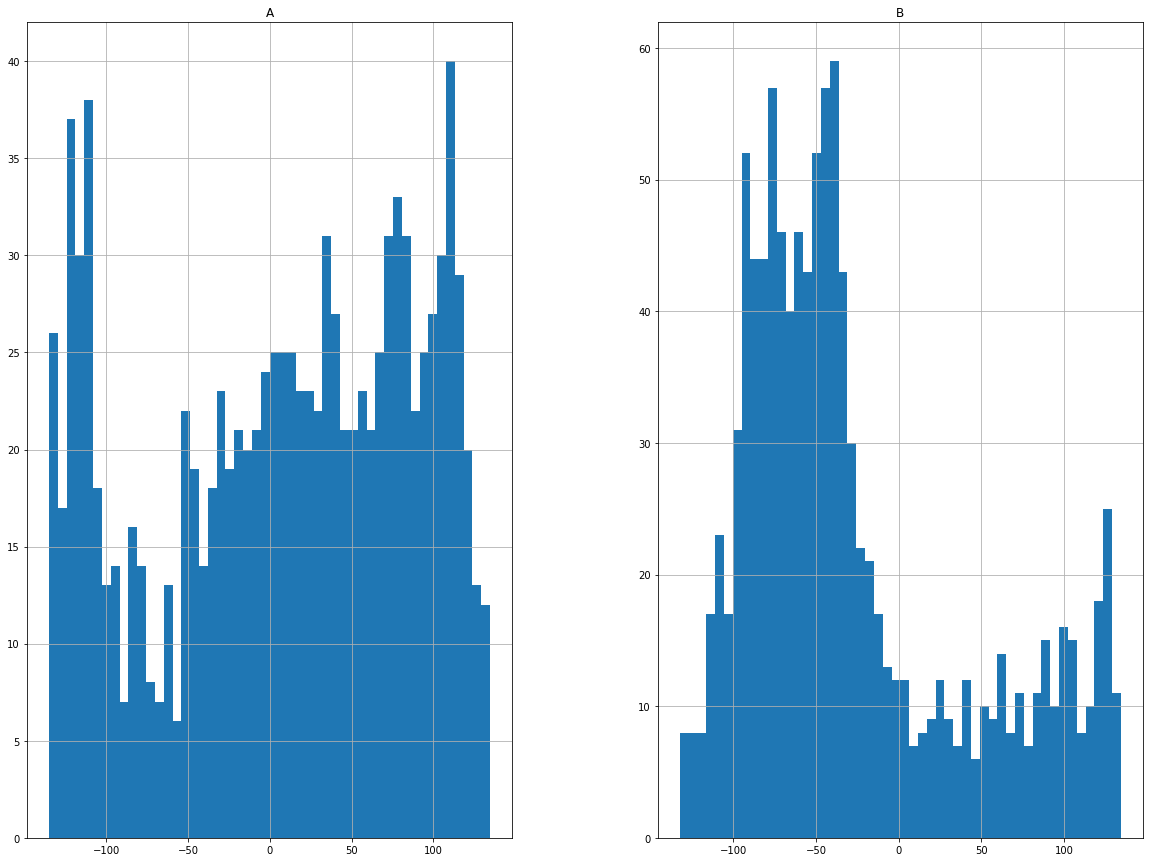

In [ ]:
data.hist(bins=50 ,figsize=(20,15))
plt.show();

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

r = data[["A", "B"]].values
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(r, i) for i in range(2)]
vif_df["feature"] = ["A", "B"]
vif_df

,VIF,feature
0,1.223842,A
1,1.223842,B


In [ ]:
X = data[['A']]
y = data[['B']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.transform(X_test)

In [ ]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
 
# train the model using the training sets
model = reg.fit(X_train, Y_train)

y_pred = reg.predict(X_test)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, Y_test)))

Coefficients:  [[0.41930159]]
Variance score: 0.3080148267469309


In [ ]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(Y_test, y_pred)
lin_rmse1 = np.sqrt(lin_mse1)
print(f"The MSE is {lin_mse1}, and RMSE is {lin_rmse1}")

# R squared value
r2_lin_test1=model.score(X_test,Y_test)
r2_lin_train1=model.score(X_train,Y_train)
print('R square values are :-')
print(r2_lin_test1,',',r2_lin_train1)

The MSE is 3269.040947585354, and RMSE is 57.175527523454946
R square values are :-
0.3080148267469309 , 0.22977518677052078


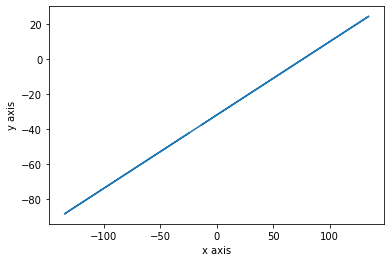

In [ ]:
import matplotlib.pyplot as plt
 
plt.plot(X_test, y_pred)
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()